In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
#Random Forest

In [39]:
train= pd.read_csv('Train.csv') 

In [40]:
test = pd.read_csv('Cm.csv') 

In [41]:
train.shape

(199, 133)

In [42]:
test.shape


(24, 133)

In [43]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [44]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [45]:
#train = train.drop(["Unnamed: 133"],axis=1)

In [46]:
train.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [47]:
train['prognosis'].value_counts()

prognosis
Fungal infection                10
Allergy                         10
Typhoid                         10
Dengue                          10
Chicken pox                     10
Malaria                         10
Jaundice                        10
Paralysis (brain hemorrhage)    10
Cervical spondylosis            10
Migraine                        10
Hypertension                    10
Bronchial Asthma                10
Gastroenteritis                 10
Diabetes                        10
AIDS                            10
Peptic ulcer diseae             10
Drug Reaction                   10
Chronic cholestasis             10
GERD                            10
hepatitis A                      9
Name: count, dtype: int64

In [48]:
A = train[["prognosis"]] # for diseases 
B = train.drop(["prognosis"],axis=1) #  for symptoms  
C = test.drop(["prognosis"],axis=1) # symptoms - testing 
x_train, x_test, y_train, y_test = train_test_split(B,A,test_size=0.2)  

In [49]:
mod = RandomForestClassifier(n_estimators = 100,n_jobs = 5, criterion= 'entropy',random_state = 42)
mod = mod.fit(x_train,y_train.values.ravel())
pred = mod.predict(x_test)

In [50]:
metrics.accuracy_score(y_test, pred)

1.0

In [51]:
report = classification_report(y_test, pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
AIDS,1.0,1.0,1.0,4.0
Allergy,1.0,1.0,1.0,2.0
Bronchial Asthma,1.0,1.0,1.0,2.0
Cervical spondylosis,1.0,1.0,1.0,2.0
Chicken pox,1.0,1.0,1.0,1.0
Chronic cholestasis,1.0,1.0,1.0,2.0
Dengue,1.0,1.0,1.0,3.0
Diabetes,1.0,1.0,1.0,1.0
Fungal infection,1.0,1.0,1.0,3.0
GERD,1.0,1.0,1.0,1.0


In [54]:
confusion_matrix(y_test, pred)



array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,

In [62]:
metrics.accuracy_score(y_test, pred)

1.0

<Axes: >

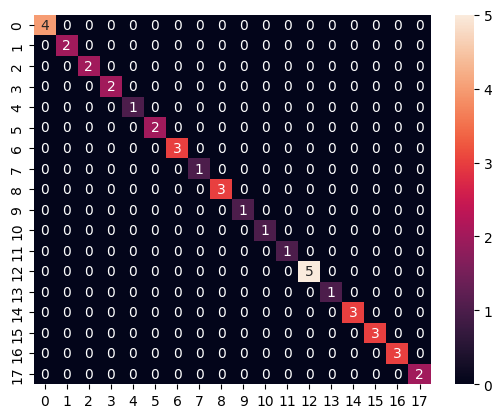

In [63]:
import seaborn as sns
sns.heatmap(cm,annot=True)